Text(0.5, -0.4, '-1')

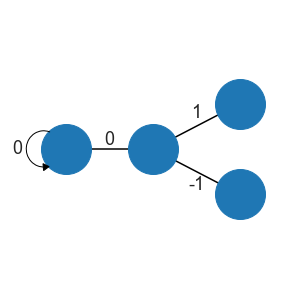

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sisyphus.envs import Helplessness
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

from sisyphus.viz import plot_helplessness
fig, ax = plt.subplots(1,1,figsize=(5,5))
plot_helplessness(ax)
ax.annotate('0', (0,0), (0.015, 0.5), 'axes fraction', va='center', ha='center', fontsize=18)
ax.annotate('0', (0,0), (-0.50, 0.1), 'data', va='center', ha='center', fontsize=18)
ax.annotate('1', (0,0), ( 0.50, 0.4), 'data', va='center', ha='center', fontsize=18)
ax.annotate('-1', (0,0), ( 0.50,-0.4), 'data', va='center', ha='center', fontsize=18)

In [3]:
ax.annotate?

Signature: ax.annotate(s, xy, *args, **kwargs)
Docstring:
Annotate the point *xy* with text *s*.

In the simplest form, the text is placed at *xy*.

Optionally, the text can be displayed in another position *xytext*.
An arrow pointing from the text to the annotated point *xy* can then
be added by defining *arrowprops*.

Parameters
----------
s : str
    The text of the annotation.

xy : (float, float)
    The point *(x,y)* to annotate.

xytext : (float, float), optional
    The position *(x,y)* to place the text at.
    If *None*, defaults to *xy*.

xycoords : str, `.Artist`, `.Transform`, callable or tuple, optional

    The coordinate system that *xy* is given in. The following types
    of values are supported:

    - One of the following strings:

      =================   =============================================
      Value               Description
      =================   =============================================
      'figure points'     Points from the lower left of 

## Model-Free Temporal Difference Learning

In [ ]:
from pandas import DataFrame
from sisyphus.mdp import ModelFree
from sisyphus.mdp._misc import softmax
from sisyphus.viz import plot_helplessness
from tqdm import tqdm
np.random.seed(47404)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulation parameters.
n_agents = 100

## Agent parameters.
beta = 0.0
inv_temp = 2

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Initialization.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
## First set of trials to establish a reward-
## maximizing policy and prevent floor effects.

## Initialize agent.
igent = ModelFree('betamax', eta=0.2, gamma=1, beta=beta)

## Initialize environment. 
gym = Helplessness(rewards=[1,0])

## Solve for Q-values. 
schedule = 10 * np.ones(100)
igent = igent.fit(gym, schedule=schedule, overwrite=True)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize environment. 
gym = Helplessness(rewards=[1,-1])

data = []
for i in tqdm(range(20)):
    
    ## Copy initial agent.
    agent = igent.copy()
    
    ## Initial entry.
    j = 0
    data.append( dict(agent=i, episode=j, v1=agent.V[0], v2=agent.V[1],
                          q1=agent.Q[0], q2=agent.Q[1], q3=agent.Q[2]) )
    
    for n in np.repeat(100,10):
        
        ## Solve for Q-values.
        agent = agent.fit(gym, schedule=np.repeat(inv_temp, n))
        
        ## Append info.
        j += n
        data.append( dict(agent=i, episode=j, v1=agent.V[0], v2=agent.V[1],
                          q1=agent.Q[0], q2=agent.Q[1], q3=agent.Q[2]) )
        
## Concatenate in DataFrame.
data = DataFrame(data)

data['theta'] = np.apply_along_axis(softmax, 1, data[['q1','q2']].values * inv_temp)[:,0]
sns.lineplot('episode', 'theta', data=data)